# Predicting Flight Arrival Delays From Various Airports

#### Importing the required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.ticker as ticker

#### Importing the Data

In [9]:
# Load the dataset
data_file = 'Airline_Delay_Cause.csv'
df = pd.read_csv(data_file)

In [10]:
#Concatinating year and month

df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

# Concatenate 'year' and 'month' columns to create 'date' column
df['date'] = df['year'] + '-' + df['month']

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

#### Checking column names for typos, converting them to uppercase and removing whitespaces for consistency

In [11]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'date'],
      dtype='object')

#### Checking if the data has been imported properly

In [12]:
print(df.head())

   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        2.46        1.00  ...              0.81            0.0           0.0   
1        4.25        0.00  ...        

## Data Cleaning and Exploratory Data analysis

#### Let's inspect the column types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256954 entries, 0 to 256953
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 256954 non-null  int32  
 1   month                256954 non-null  int32  
 2   carrier              256954 non-null  object 
 3   carrier_name         256954 non-null  object 
 4   airport              256954 non-null  object 
 5   airport_name         256954 non-null  object 
 6   arr_flights          256523 non-null  float64
 7   arr_del15            256259 non-null  float64
 8   carrier_ct           256523 non-null  float64
 9   weather_ct           256523 non-null  float64
 10  nas_ct               256523 non-null  float64
 11  security_ct          256523 non-null  float64
 12  late_aircraft_ct     256523 non-null  float64
 13  arr_cancelled        256523 non-null  float64
 14  arr_diverted         256523 non-null  float64
 15  arr_delay        

#### Inspect if there are any missing values in the dataset

In [14]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            431
arr_del15              695
carrier_ct             431
weather_ct             431
nas_ct                 431
security_ct            431
late_aircraft_ct       431
arr_cancelled          431
arr_diverted           431
arr_delay              431
carrier_delay          431
weather_delay          431
nas_delay              431
security_delay         431
late_aircraft_delay    431
date                     0
dtype: int64


There are missing values found for various predictor columns. So further processing is required to hanlde them. As the missing values are very less in comparison to the dataset values, so dropping them will not impact our analysis.

#### Drop the rows with missing values to get better results with prediction

In [15]:
df.dropna(inplace=True)
print(df.head(5))

   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  late_aircraft_ct  arr_cancelled  arr_diverted  \
0        2.46        1.00  ...              0.81            0.0           0.0   
1        4.25        0.00  ...        

#### As the goal of our project is to predict flight delays, so let's create a new column for arrival delay for each airport 

In [16]:
# Display the shape of the DataFrame
print("Shape:", df.shape)

# Display the data types of the columns
print("Data types:\n", df.dtypes)

# Display the summary statistics of the numerical columns
print("\nSummary statistics:\n", df.describe())

Shape: (256259, 22)
Data types:
 year                     int32
month                    int32
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
date                    object
dtype: object

Summary statistics:
                 year          month    arr_flights      arr_del15  \
count  256259.000000  256259.000000  256259.000000  256259.000000   
mean     2017.190393       6.497235     349.246302      63.622320   
std         4.092154       3.460449     96

### How many years of data do we have?

In [17]:
print(f"List of the years that we have in the data: {df['year'].unique()}")
print(f"Number of years available: {df['year'].nunique()}")

List of the years that we have in the data: [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]
Number of years available: 14


### We have a total of 14 years of data, starting from 2010 till the end of 2023

### How many flights did carrier operate over the years?

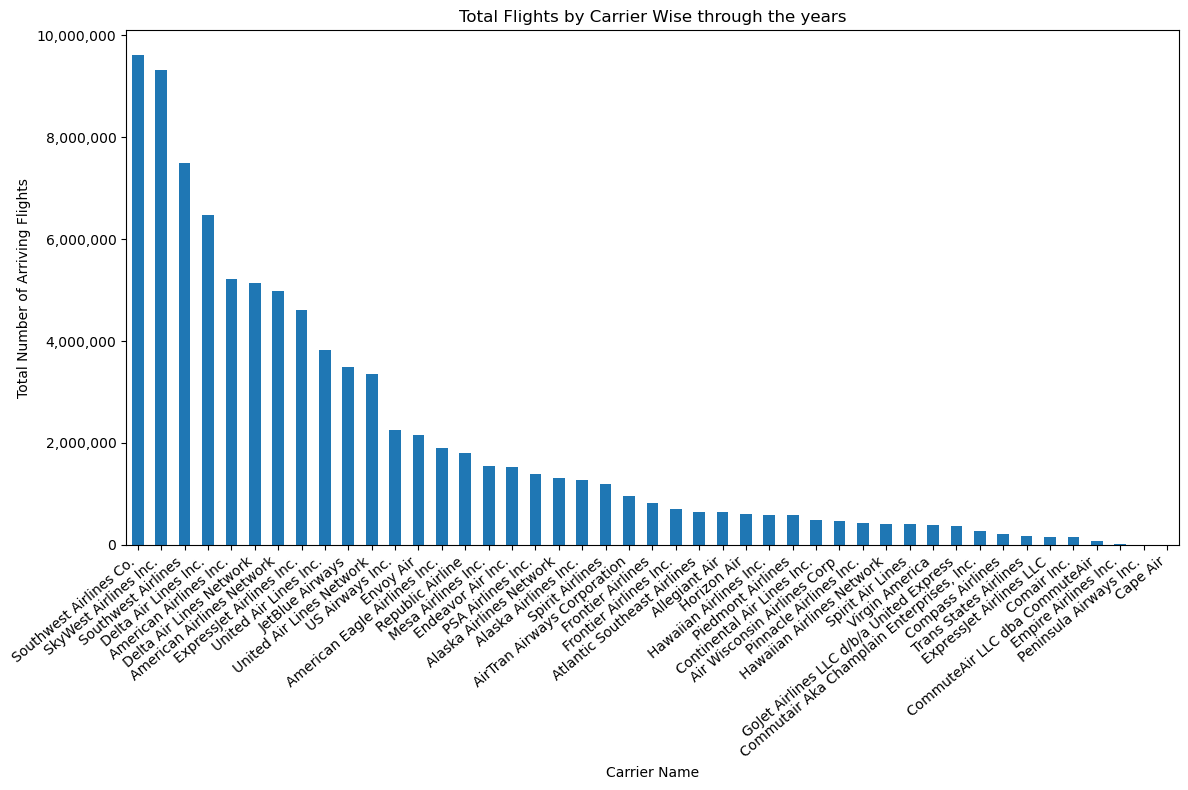

In [18]:
1. # Bar Plot of Total Arriving Flights by Carrier
plt.figure(figsize=(12, 8))
flights_per_carrier = df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
flights_per_carrier.plot(kind='bar')
plt.title('Total Flights by Carrier Wise through the years')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### How many flights did each carrier operate from 2021 through 2023

In [19]:
primary_df = df[(df['year']>=2021) & (df['year']<=2023)]

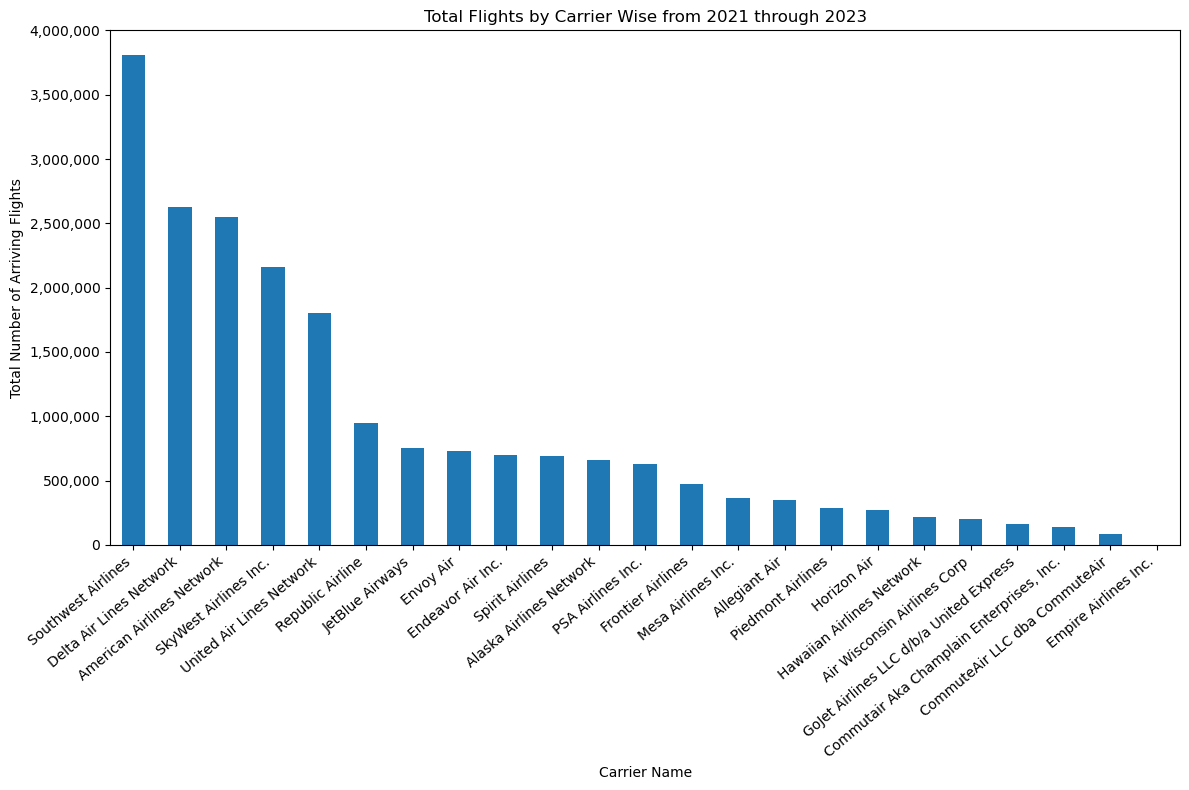

In [20]:
1. # Bar Plot of Total Arriving Flights by Carrier
plt.figure(figsize=(12, 8))
flights_per_carrier_pdf = primary_df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
flights_per_carrier_pdf.plot(kind='bar')
plt.title('Total Flights by Carrier Wise from 2021 through 2023')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Which 5 carriers had the highest count of flights operated through all the years?

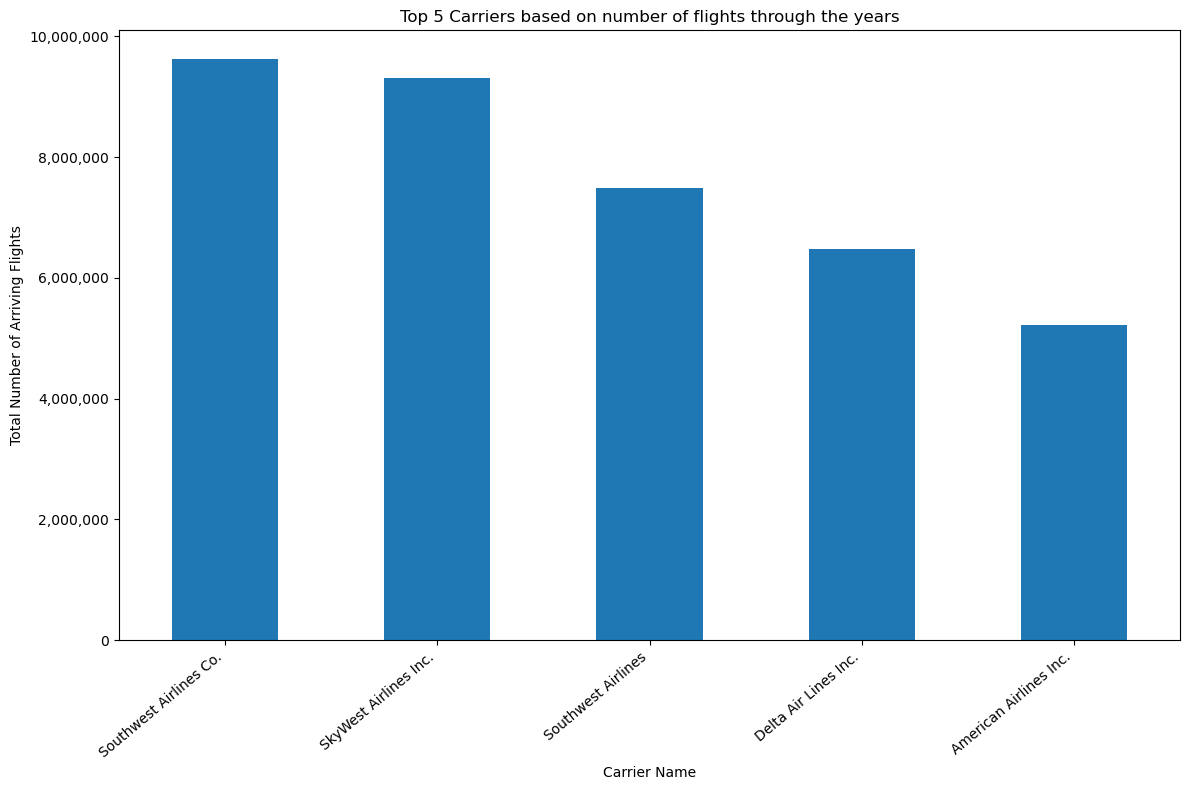

In [21]:
1. # Bar Plot of Total Arriving Flights by Carrier
plt.figure(figsize=(12, 8))
flights_per_carrier = df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
top_5_carriers = flights_per_carrier.head(5)
top_5_carriers.plot(kind='bar')
plt.title('Top 5 Carriers based on number of flights through the years')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Which 5 carriers operated the most flights from 2021 through 2023?

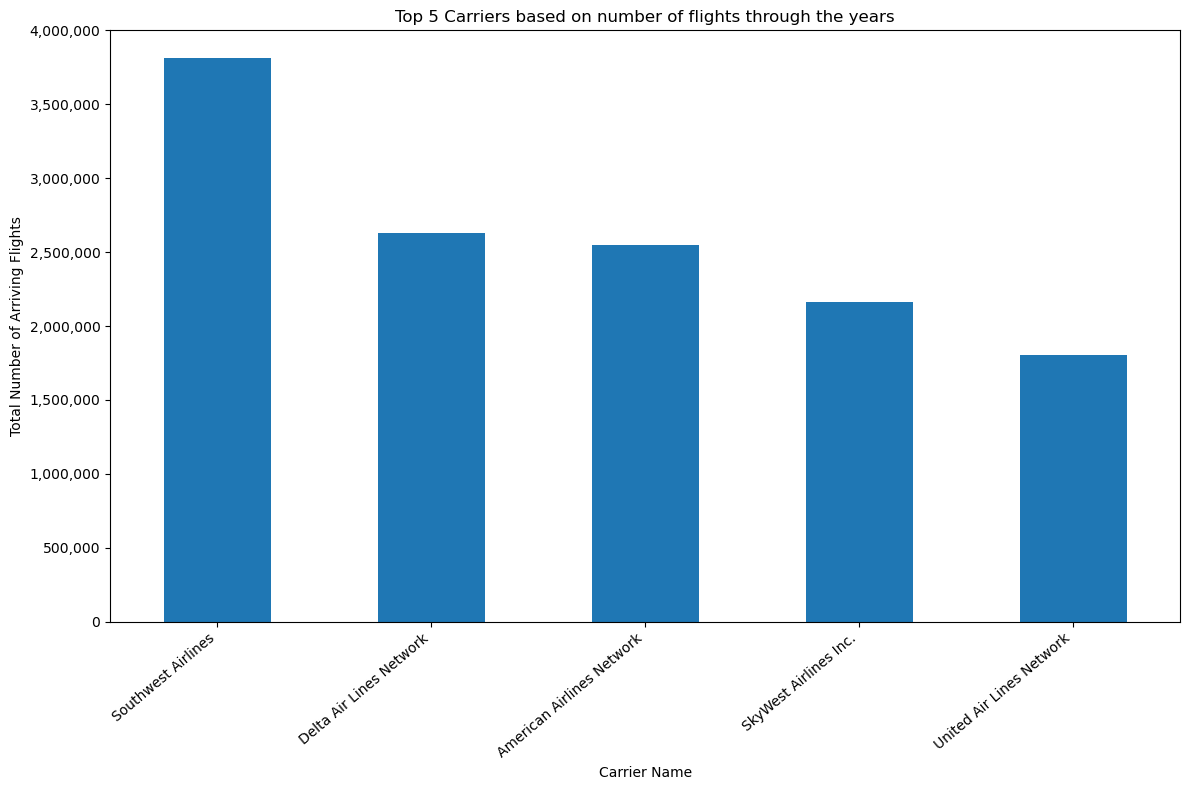

In [22]:
1. # Bar Plot of Total Arriving Flights by Carrier
plt.figure(figsize=(12, 8))
flights_per_carrier_pdf = primary_df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
top_5_carriers_21to23 = flights_per_carrier_pdf.head(5)
top_5_carriers_21to23.plot(kind='bar')
plt.title('Top 5 Carriers based on number of flights through the years')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

#### Possible Insight: Succesful airlines have retained the number of flights operated through the years

### What are the carriers with the lowest flights through all the years?

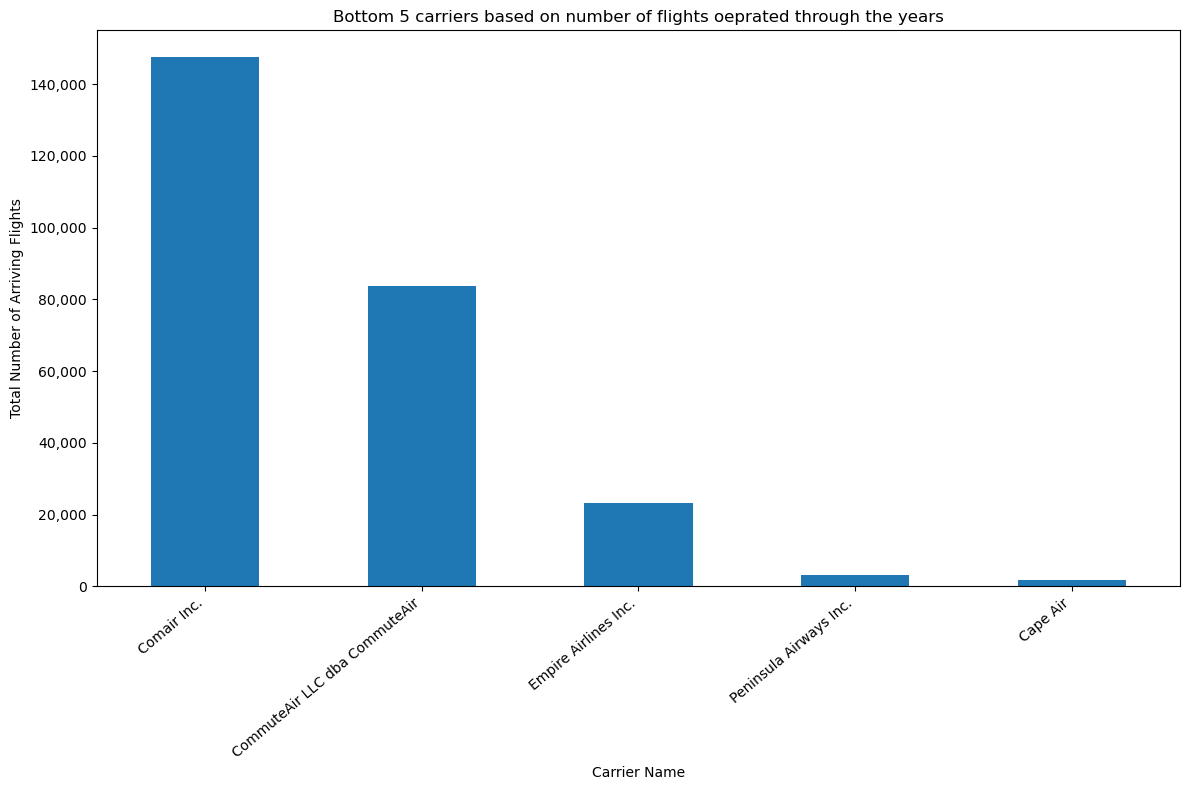

In [23]:
1. # Bar Plot of Total Arriving Flights by Carrier
plt.figure(figsize=(12, 8))
flights_per_carrier = df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
lowest_5_carriers = flights_per_carrier.tail(5)
lowest_5_carriers.plot(kind='bar')
plt.title('Bottom 5 carriers based on number of flights oeprated through the years')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### What are the carriers with the least amount of flight operated from 2021 through 2023?

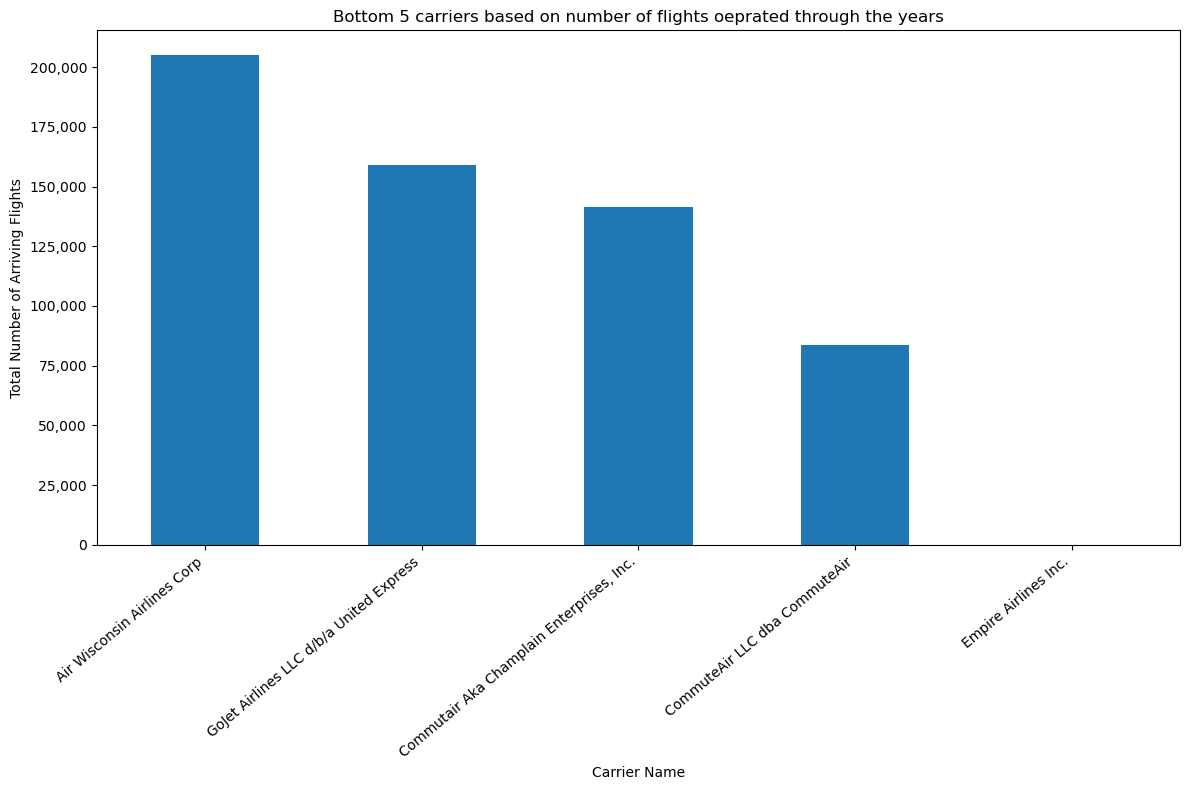

In [24]:
1. # Bar Plot of Total Arriving Flights by Carrier
plt.figure(figsize=(12, 8))
flights_per_carrier_pdf = primary_df.groupby('carrier_name')['arr_flights'].sum().sort_values(ascending=False)
lowest_5_carriers_21to23 = flights_per_carrier_pdf.tail(5)
lowest_5_carriers_21to23.plot(kind='bar')
plt.title('Bottom 5 carriers based on number of flights oeprated through the years')
plt.xlabel('Carrier Name')
plt.ylabel('Total Number of Arriving Flights')
plt.xticks(rotation=40, ha='right')
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

#### Possible Insight: Few carriers like the Comair Inc might have ceased their operations all together. 

### What were the busiest airports form 2021 through 2023?

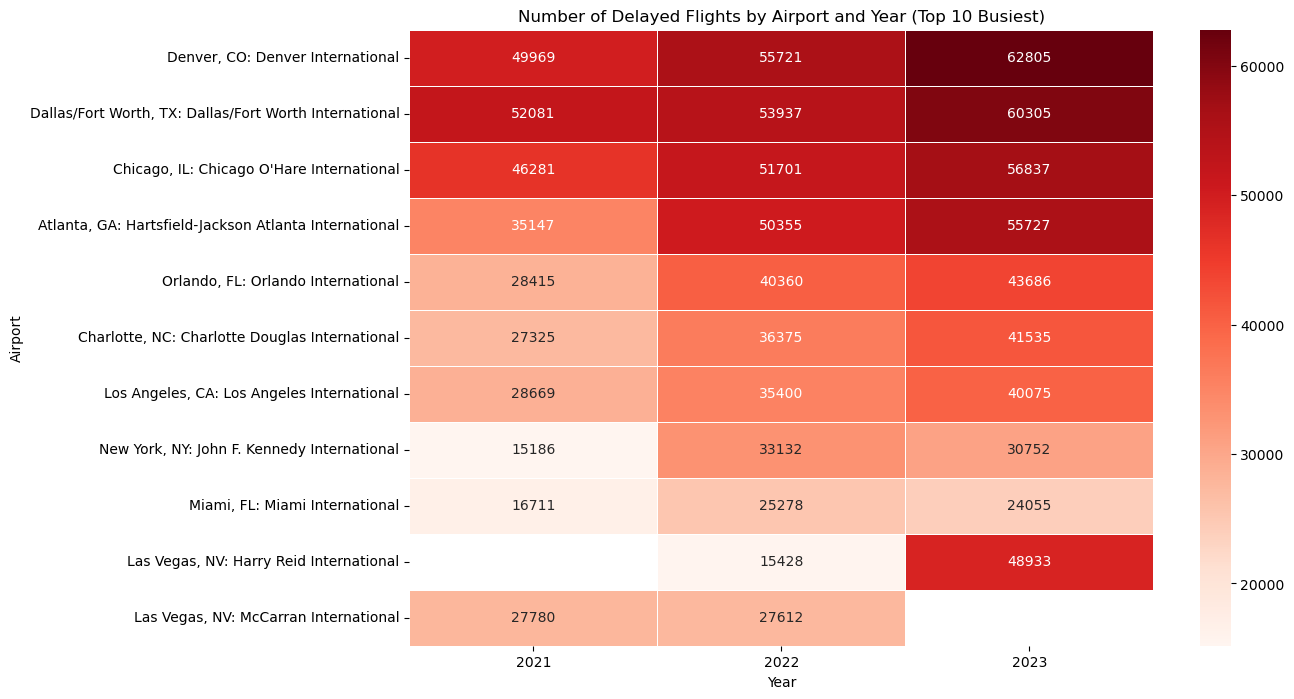

In [25]:

# Top 10 busiest airports
busiest_airports = ['ATL', 'DFW', 'DEN', 'ORD', 'LAX', 'JFK', 'LAS', 'MCO', 'MIA', 'CLT']

# Filter the dataset to include only flights from the top 10 busiest airports
primary_df_top_10 = primary_df[primary_df['airport'].isin(busiest_airports)]

# Grouping by airport and year and summing delayed flights
delayed_flights_by_airport_year = primary_df_top_10.groupby(['airport_name', 'year'])['arr_del15'].sum().reset_index()

# Pivot the data for heatmap plotting
delayed_flights_by_airport_year_pivot = delayed_flights_by_airport_year.pivot(index="airport_name", columns="year", values="arr_del15")

# Sort the airports by total delays across all years
total_delays_per_airport = delayed_flights_by_airport_year.groupby('airport_name')['arr_del15'].sum().sort_values(ascending=False)
sorted_airports = total_delays_per_airport.index.tolist()

# Reorder the rows of the pivot table according to the sorted airports
delayed_flights_by_airport_year_pivot = delayed_flights_by_airport_year_pivot.reindex(sorted_airports)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(delayed_flights_by_airport_year_pivot, cmap="Reds", annot=True, fmt="g", linewidths=.5)
plt.title('Number of Delayed Flights by Airport and Year (Top 10 Busiest)')
plt.xlabel('Year')
plt.ylabel('Airport')
plt.show()

### What are the 30 most busiest aiports from our data?

The data has been grouped by aircode code and then number of flights arriving on each airport has been summed up. The sorting has been done in the descending order.

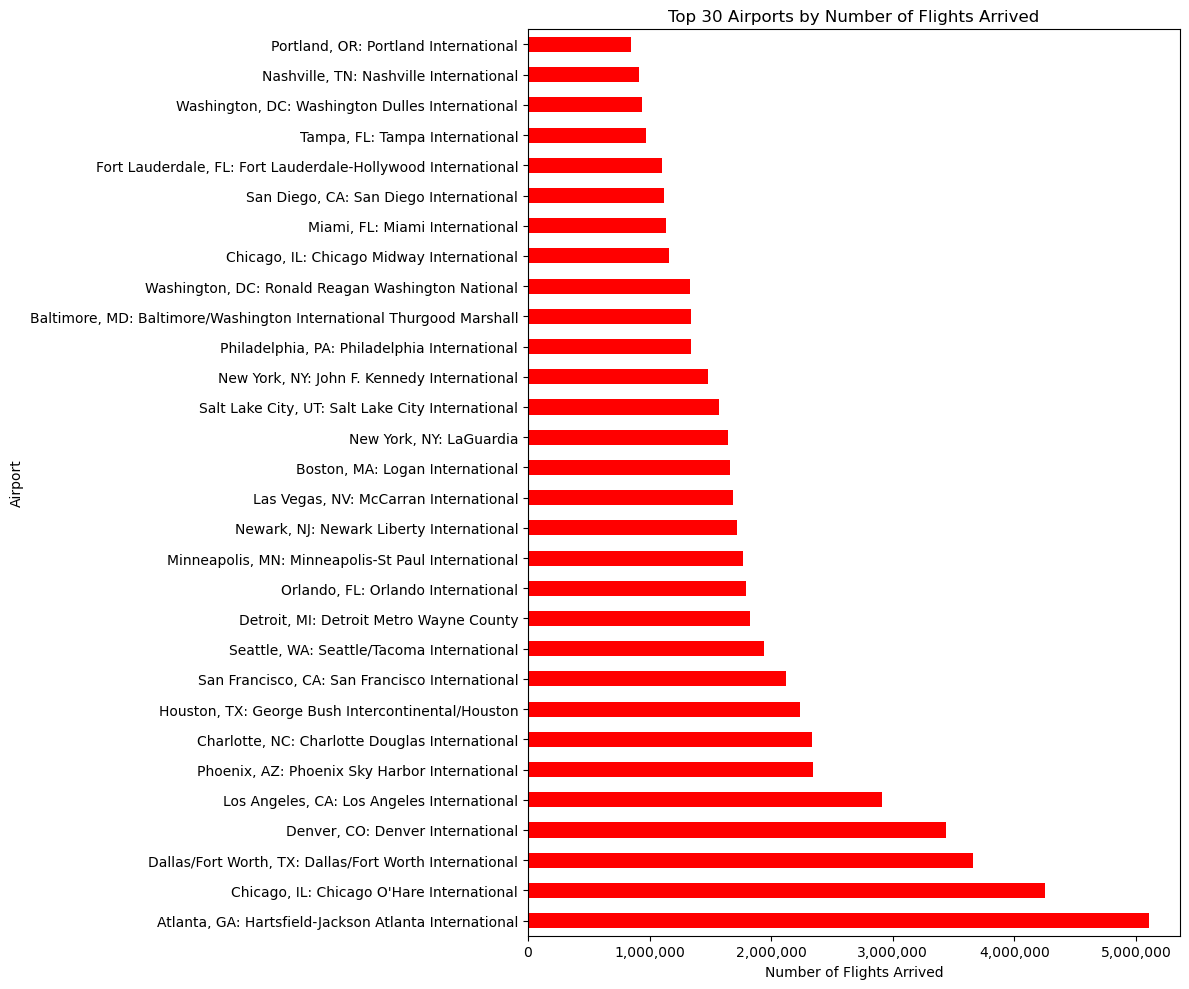

In [26]:
#Top 30 busy airports by number of flights arriving
import matplotlib.pyplot as plt

# Sort the airports by the number of flights arrived
top_30_airports = df.groupby('airport_name')['arr_flights'].sum().nlargest(30)

# Plotting
plt.figure(figsize=(12, 10))
top_30_airports.sort_values().plot(kind='barh', color='red')
plt.xlabel('Number of Flights Arrived')
plt.ylabel('Airport')
plt.title('Top 30 Airports by Number of Flights Arrived')
plt.gca().invert_yaxis() 
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

#### It has been observed that Atlanta International is the busiest airport.

### Over the years from 2021 through 2023, which airport had most number of flights that were delayed? Is it Atlanta?

In [20]:
# Grouping by airport and year and summing delayed flights
delayed_flights_by_airport_year = primary_df.groupby(['airport_name', 'year'])['arr_del15'].sum().reset_index()
delayed_flights_by_airport_year.sort_values('arr_del15').sort_values('arr_del15')

,airport_name,year,arr_del15
813,"Pierre, SD: Pierre Regional",2022,0.0
146,"Bullhead City, AZ: Laughlin/Bullhead Internati...",2022,1.0
1095,"Watertown, SD: Watertown Regional",2022,2.0
462,"Hoolehua, HI: Molokai",2021,2.0
850,"Pueblo, CO: Pueblo Memorial",2023,3.0
...,...,...,...
269,"Denver, CO: Denver International",2022,55721.0
58,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2023,55727.0
197,"Chicago, IL: Chicago O'Hare International",2023,56837.0
252,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",2023,60305.0


#### We can observe that Denver had the most number of delayed flights in 2023, approximately 5,000 more than Atlanta

### After looking at the aiports, which carriers had the most number of delays over the years? Have the delays increased over the years ( likeness observed in airports)?

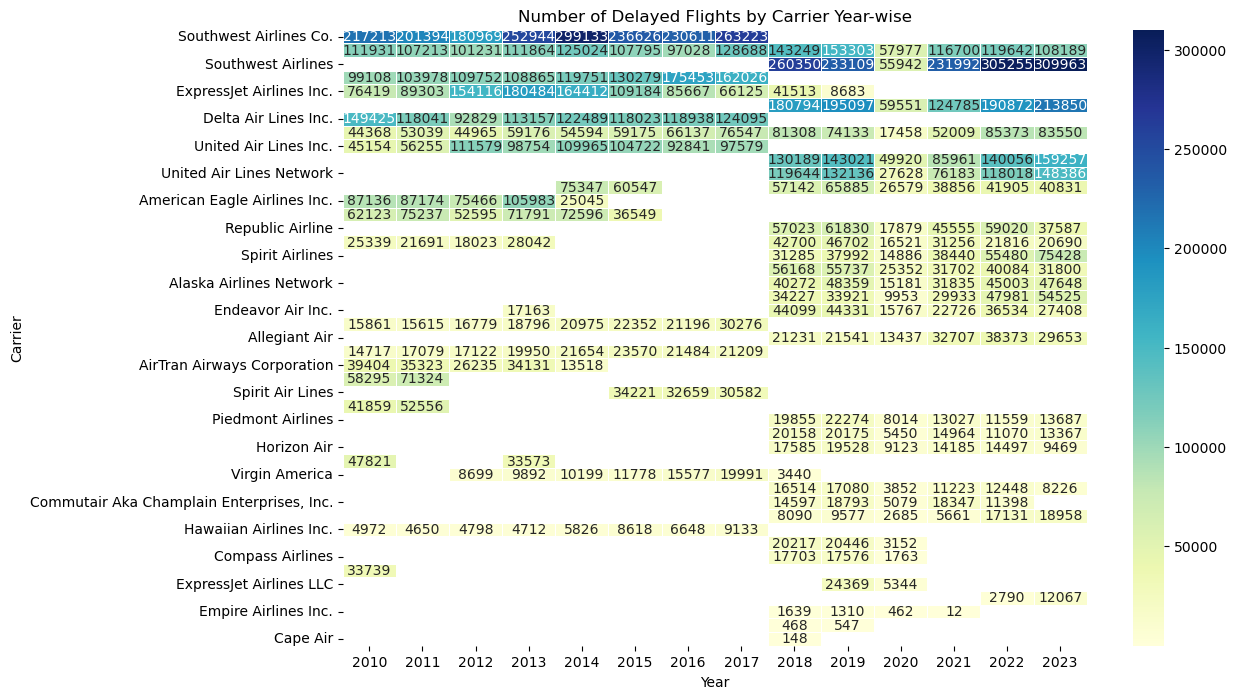

In [27]:


#VISUALIZATION
#Airlines with the most delays year-wise in descending order
# Grouping by carrier and year and summing delayed flights
delayed_flights_by_carrier_year = df.groupby(['carrier_name', 'year'])['arr_del15'].sum()

# Reshape the data for heatmap plotting
delayed_flights_by_carrier_year = delayed_flights_by_carrier_year.reset_index()
delayed_flights_by_carrier_year_pivot = delayed_flights_by_carrier_year.pivot(index="carrier_name", columns="year", values="arr_del15")

# Sort the airlines by total delays across all years
total_delays_per_carrier = delayed_flights_by_carrier_year.groupby('carrier_name')['arr_del15'].sum().sort_values(ascending=False)
sorted_carriers = total_delays_per_carrier.index.tolist()

# Reorder the rows of the pivot table according to the sorted carriers
delayed_flights_by_carrier_year_pivot = delayed_flights_by_carrier_year_pivot.reindex(sorted_carriers)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(delayed_flights_by_carrier_year_pivot, cmap="YlGnBu", annot=True, fmt="g", linewidths=.5)
plt.title('Number of Delayed Flights by Carrier Year-wise')
plt.xlabel('Year')
plt.ylabel('Carrier')
plt.show()

#### We can observe a general increase in the number of delayed flights for each carrier in the recent years (2021 through 2023).
### Southwest Airlines had the most number of delayed flights, and like the airports we can observe an increase in number of flights delayed with the popular carriers

### What are the number of flights delayed due to various reasons over the years? What caused the highest delays in arrival?

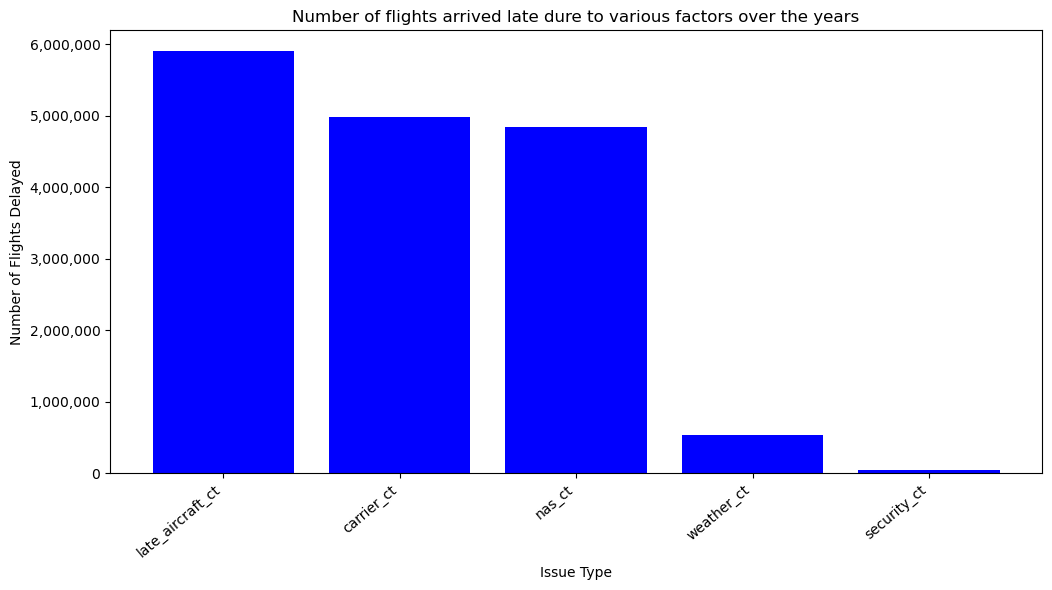

In [28]:
# Box Plot of Delayed Flights by Type of Issue:
import seaborn as sns
delay_types = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
delay_data = df[delay_types]
plt.figure(figsize=(10, 6))
delay_data_sum = delay_data.sum().sort_values(ascending=False)
plt.bar(delay_data_sum.index, delay_data_sum.values, color='blue')
#sns.boxplot(data=delay_data, palette='Set2')
plt.title('Number of flights arrived late dure to various factors over the years')
plt.xlabel('Issue Type')
plt.ylabel('Number of Flights Delayed')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Text(0.5, 1.0, 'Factors leading to the late arrival of flights over the years')

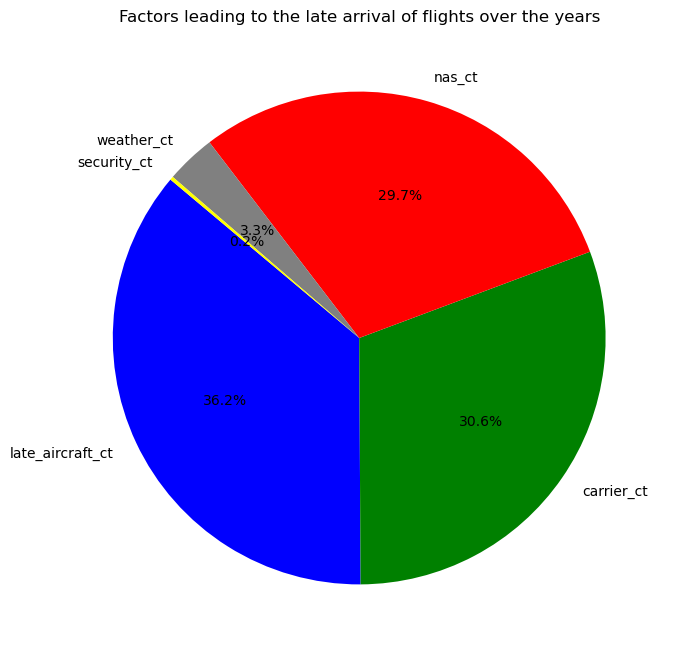

In [23]:
delay_data_sum.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red','grey','yellow'])
plt.title('Factors leading to the late arrival of flights over the years')

#### From the data we can observe that the late_arrival_ct which is feature indicating that the arrival of a flight wa delayeed due to an earlier late arrival of a flight.
#### Over the years, it had caused over 5 Millions flight to arrive late. Sort of like a chain reaction. We can also observe that the least number of flights arrived late due to security checks

### Does the same hold true for the recent as well? Has there been any change in the number of flights that arrived late due to the various reasons?

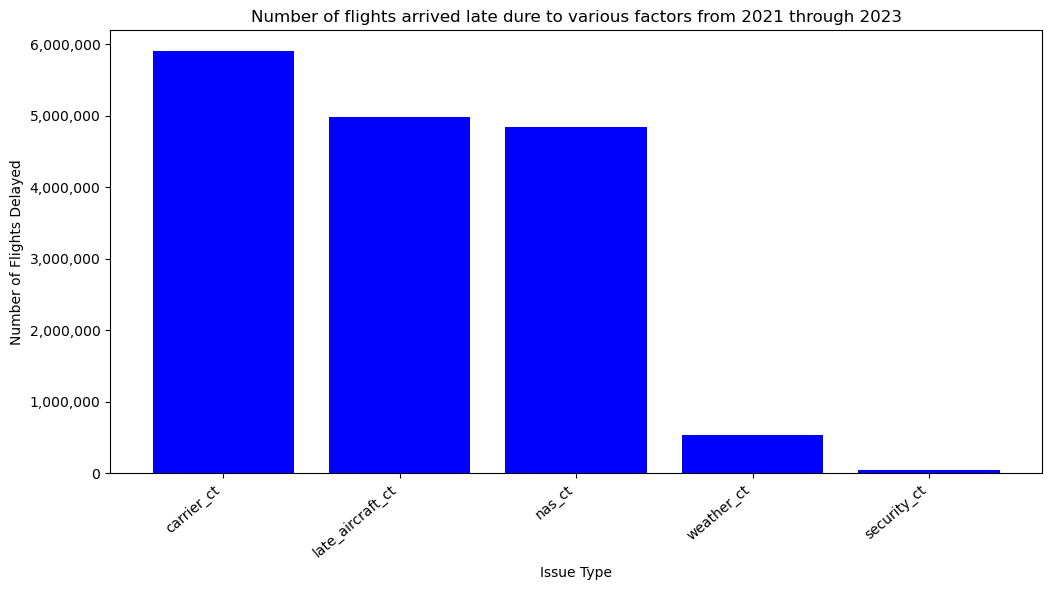

In [24]:
# Box Plot of Delayed Flights by Type of Issue:
import seaborn as sns
delay_types = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
primary_delay_data = primary_df[delay_types]
plt.figure(figsize=(10, 6))
primary_delay_data_sum = primary_delay_data.sum().sort_values(ascending=False)
plt.bar(primary_delay_data_sum.index, delay_data_sum.values, color='blue')
#sns.boxplot(data=delay_data, palette='Set2')
plt.title('Number of flights arrived late dure to various factors from 2021 through 2023')
plt.xlabel('Issue Type')
plt.ylabel('Number of Flights Delayed')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Text(0.5, 1.0, 'Factors leading to the late arrival of flights from 2021 through 2023')

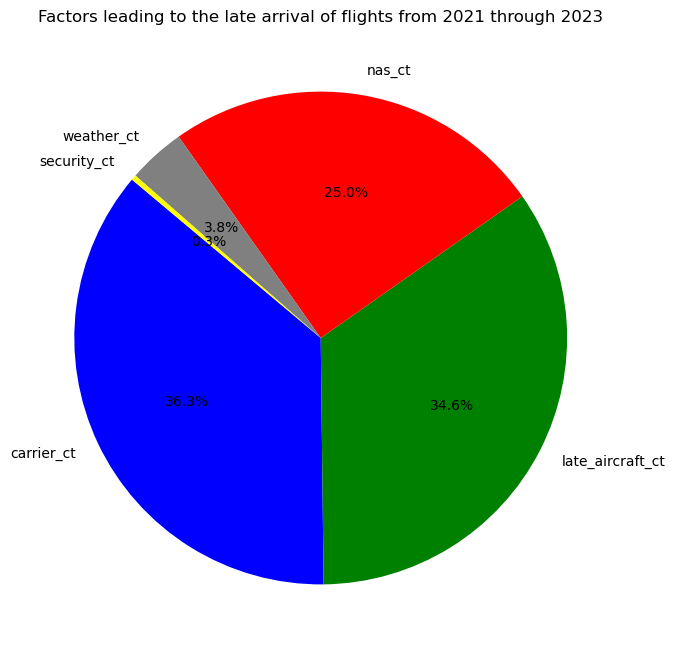

In [25]:
primary_delay_data_sum.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red','grey','yellow'])
plt.title('Factors leading to the late arrival of flights from 2021 through 2023')

#### Interestingly, over the last few years there's been a change in the reason to flights getting delayed. We can observe that a higher number of flights arrived late because of carrier issues, rather than an earlier flight.
#### With considerable increase in the number of operational flights, carriers seem to have run into issues that are leading to delays in arrivals

### Which carrier faced the most carrier issues? (Considering the last 3 years)

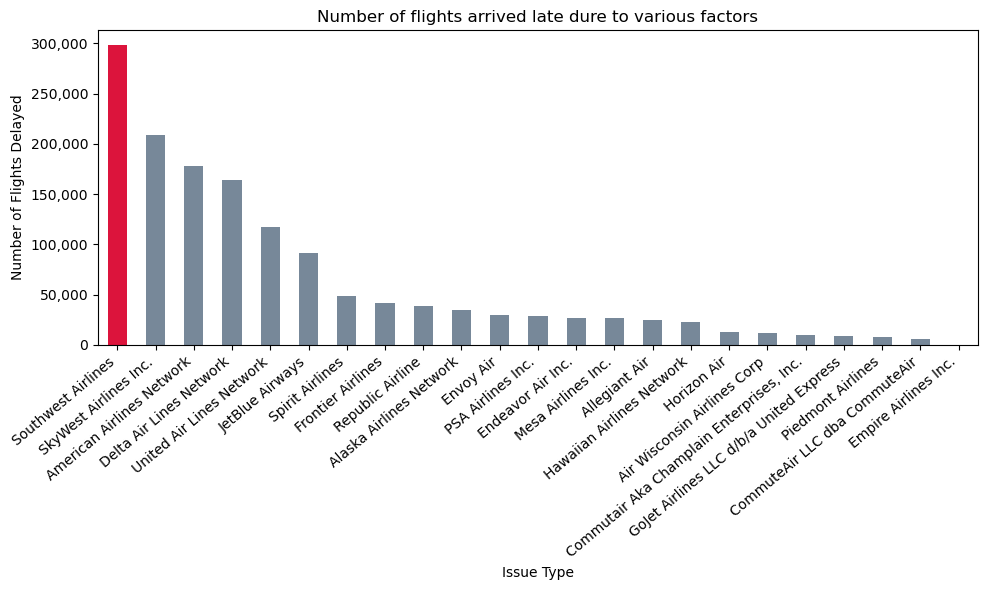

In [26]:
plt.figure(figsize=(10, 6))
flights_delayed_carrierct_pdf = primary_df.groupby('carrier_name')['carrier_ct'].sum().sort_values(ascending=False)
colors = ['lightslategray'] * primary_df['carrier_name'].nunique()
colors[0] = 'crimson'
flights_delayed_carrierct_pdf.plot(kind='bar',color = colors)
plt.title('Number of flights arrived late dure to various factors')
plt.xlabel('Issue Type')
plt.ylabel('Number of Flights Delayed')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
formatter = ticker.StrMethodFormatter("{x:,.0f}")  # Customize format as needed
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

#### In the recent years, Southwest Airlines Co. seems to have the highest number of flights that arrived late due to some form of carrier issues

### is there a correlation between the different causes of delay?

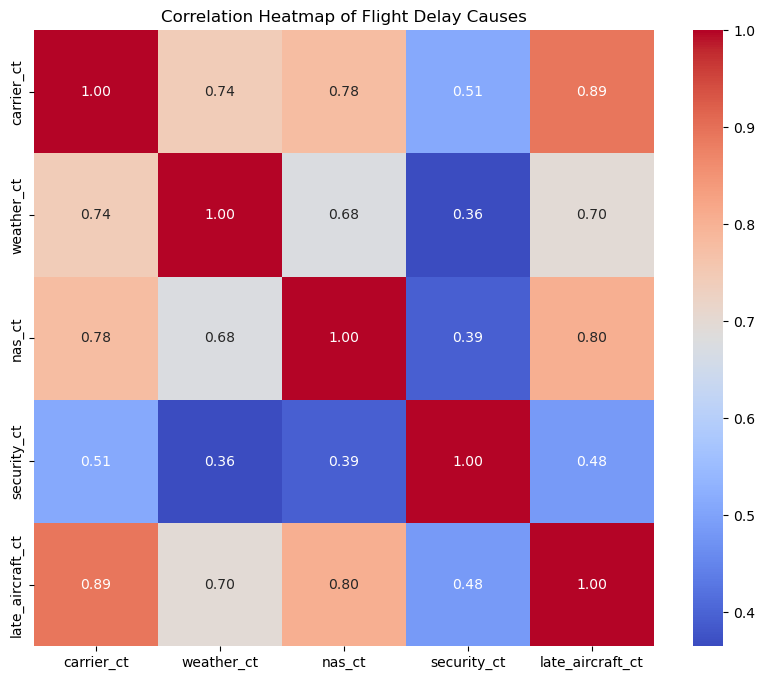

In [27]:
heatmap= df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]
correlation_matrix = heatmap.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Flight Delay Causes')
plt.show()

#### The carrier_ct (which is when a flight is delayed due to some form of carrier issue) and late_aircraft_ct (when a flight is delayed due to an earlier late arrival of flight) are highly correlated. 

### Which month usually had the most delay in arrivals (time)?

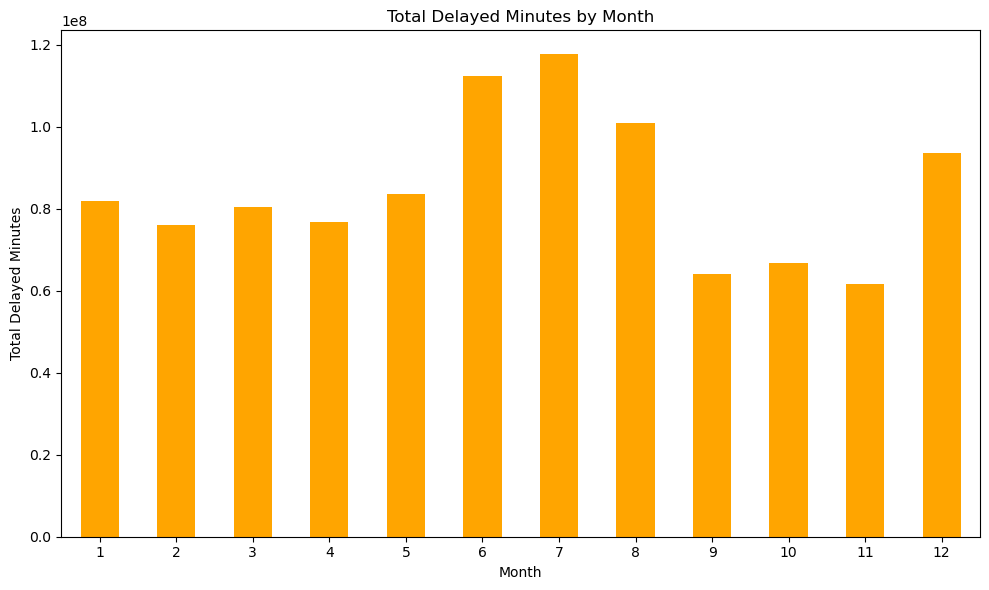

In [29]:
#Visualize in which season or month the flights are delayed the most in terms of total delayed minutes
import matplotlib.pyplot as plt

# Group by month and sum the total delayed minutes
delayed_minutes_by_month = df.groupby('month')['arr_delay'].sum()

# Plotting
plt.figure(figsize=(10, 6))
delayed_minutes_by_month.plot(kind='bar', color='orange')
plt.title('Total Delayed Minutes by Month')
plt.xlabel('Month')
plt.ylabel('Total Delayed Minutes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#  REGRESSION

__1.1 LINEAR REGRESSION__<br>
 Linear regression is a simple and interpretable model that assumes a linear relationship between the independent variables (features) and the dependent variable (arrival delay). 

__1.2 GRADIENT BOOSTING__<br>
Gradient Boosting is another ensemble learning method that builds trees sequentially,where each tree corrects the errors of the previous one.
It often provides better predictive accuracy than Random Forest, especially for structured/tabular data like flight delay datasets.

__1.3 K-NEAREST NEIGHBORS REGRESSION (KNN)__<br>
KNNis a non-parametric regression algorithm that predicts the target variable by averaging the values of its k nearest neighbors. It's suitable for capturing complex patterns in the data without assuming a specific functional form.

__1.4 DECISION TREE__<br>
Decision trees are simple and interpretable models that partition the feature space into regions and predict the target variable based on the majority vote of the training samples in each region. Decision trees can capture complex interactions between features and the target variable.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Filter data for years 2021, 2022, and 2023

df['date'] = pd.to_datetime(df['date'])

# Filter training data from January 2021 to April 2023
train_start_date = '2021-1'
train_end_date = '2023-5'
train_data = df[(df['date'] >= train_start_date) & (df['date'] < train_end_date)]

# Filter testing data from May 2023 to December 2023
test_start_date = '2023-4'
test_end_date = '2023-12'
test_data = df[(df['date'] > test_start_date) & (df['date'] <= test_end_date)]

# Define features and target variable
features = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
            'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
target = 'arr_delay'

# Split the training and testing data into features and target variable
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# 1. Linear Regression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_predictions = linear_regression_model.predict(X_test)

# 2. Gradient Boosting Regression
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

# 3. K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# 4. Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluation
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, mae, r2

# Evaluation for Linear Regression
mse_lr, rmse_lr, mae_lr, r2_lr = evaluate_model(linear_regression_predictions, y_test)

# Evaluation for Gradient Boosting Regression
mse_gb, rmse_gb, mae_gb, r2_gb = evaluate_model(gradient_boosting_predictions, y_test)

# Evaluation for K-Nearest Neighbors Regression
mse_knn, rmse_knn, mae_knn, r2_knn = evaluate_model(knn_predictions, y_test)

# Evaluation for Decision Tree Regression
mse_dt, rmse_dt, mae_dt, r2_dt = evaluate_model(decision_tree_predictions, y_test)



# Example input features for new data
new_data = [[2, 0, 3, 0, 1, 10, 5, 2, 6, 3]] 

# Linear Regression
linear_regression_prediction = linear_regression_model.predict(new_data)

# Gradient Boosting Regression
gradient_boosting_prediction = gradient_boosting_model.predict(new_data)

# K-Nearest Neighbors Regression
knn_prediction = knn_model.predict(new_data)

# Decision Tree Regression
decision_tree_prediction = decision_tree_model.predict(new_data)

# Print evaluation metrics for each model
print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared Score:", r2_lr)
print("Predicted Arrival Delay for New Data (Linear Regression):", linear_regression_prediction[0])
print()

print("Gradient Boosting Regression:")
print("Mean Squared Error:", mse_gb)
print("Root Mean Squared Error:", rmse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared Score:", r2_gb)
print("Predicted Arrival Delay for New Data (Gradient Boosting Regression):", gradient_boosting_prediction[0])
print()

print("K-Nearest Neighbors Regression:")
print("Mean Squared Error:", mse_knn)
print("Root Mean Squared Error:", rmse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared Score:", r2_knn)
print("Predicted Arrival Delay for New Data (K-Nearest Neighbors Regression):", knn_prediction[0])
print()

print("Decision Tree Regression:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared Score:", r2_dt)
print("Predicted Arrival Delay for New Data (Decision Tree Regression):", decision_tree_prediction[0])



Linear Regression:
Mean Squared Error: 3.7511239808430434
Root Mean Squared Error: 1.9367818619666604
Mean Absolute Error: 0.02412321381396189
R-squared Score: 0.9999999840462306
Predicted Arrival Delay for New Data (Linear Regression): 26.005529345738264

Gradient Boosting Regression:
Mean Squared Error: 3047619.83483848
Root Mean Squared Error: 1745.7433473562144
Mean Absolute Error: 202.64442866494537
R-squared Score: 0.987038278559798
Predicted Arrival Delay for New Data (Gradient Boosting Regression): 61.91340669708774

K-Nearest Neighbors Regression:
Mean Squared Error: 3057029.981565124
Root Mean Squared Error: 1748.436439097837
Mean Absolute Error: 136.61098520197308
R-squared Score: 0.9869982566058824
Predicted Arrival Delay for New Data (K-Nearest Neighbors Regression): 15.0

Decision Tree Regression:
Mean Squared Error: 5098099.2397013735
Root Mean Squared Error: 2257.8970835052187
Mean Absolute Error: 314.7047060391948
R-squared Score: 0.9783174589349602
Predicted Arrival D

C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Comparison of the four regression models based on their performance metrics:

## __Linear Regression:__<br>
Mean Squared Error: 4.525309298786422<br>
Root Mean Squared Error: 2.1272774381322295<br>
Mean Absolute Error: 0.023383330096081255<br>
R-squared Score: 0.9999999836090185<br>
Predicted Arrival Delay for New Data: 26.00051865793176<br><br>

## __Gradient Boosting Regression:__<br>
Mean Squared Error: 3444295.1658369293<br>
Root Mean Squared Error: 1855.8812369968423<br>
Mean Absolute Error: 217.06870424962503<br>
R-squared Score: 0.9875245260787622<br>
Predicted Arrival Delay for New Data: 62.41592128181278<br><br>

## __K-Nearest Neighbors Regression:__<br>
Mean Squared Error: 3679672.367484722<br>
Root Mean Squared Error: 1918.2472122968722<br>
Mean Absolute Error: 158.65090061112898<br>
R-squared Score: 0.9866719736698001<br>
Predicted Arrival Delay for New Data: 15.0<br><br>

## __Decision Tree Regression:__<br>
Mean Squared Error: 6362779.776696687<br>
Root Mean Squared Error: 2522.455108955695<br>
Mean Absolute Error: 358.53031521389516<br>
R-squared Score: 0.9769535741425138<br>
Predicted Arrival Delay for New Data: 34.0<br><br>

# __ANALYSIS__<br>

__Mean Squared Error (MSE):__<br>
Linear Regression has the lowest MSE, indicating the smallest spread of errors among the models. Gradient Boosting Regression has the second lowest MSE, followed by K-Nearest Neighbors Regression and Decision Tree Regression.<br><br>

__Root Mean Squared Error (RMSE):__<br>
Again, Linear Regression has the lowest RMSE, implying that its predictions are closest to the actual values on average. Gradient Boosting Regression has the second lowest RMSE, followed by K-Nearest Neighbors Regression and Decision Tree Regression.<br><br>

__Mean Absolute Error (MAE):__<br>
Linear Regression has the lowest MAE, indicating the smallest average absolute difference between its predictions and the actual values. K-Nearest Neighbors Regression has the second lowest MAE, followed by Gradient Boosting Regression and Decision Tree Regression.<br><br>

__R-squared Score:__<br>
Linear Regression has the highest R-squared score, indicating that it explains the most variance in the target variable. Gradient Boosting Regression has the second highest R-squared score, followed by K-Nearest Neighbors Regression and Decision Tree Regression.<br><br>


__-Overall, Linear Regression performs the best among the four models, with the lowest errors and highest R-squared score, indicating the best fit to the data.<br>
-Gradient Boosting Regression also performs well, capturing a significant portion of the variance in the target variable.<br>
-K-Nearest Neighbors Regression and Decision Tree Regression show slightly higher errors and lower R-squared scores, suggesting that they may not fit the data as well as the other models.__

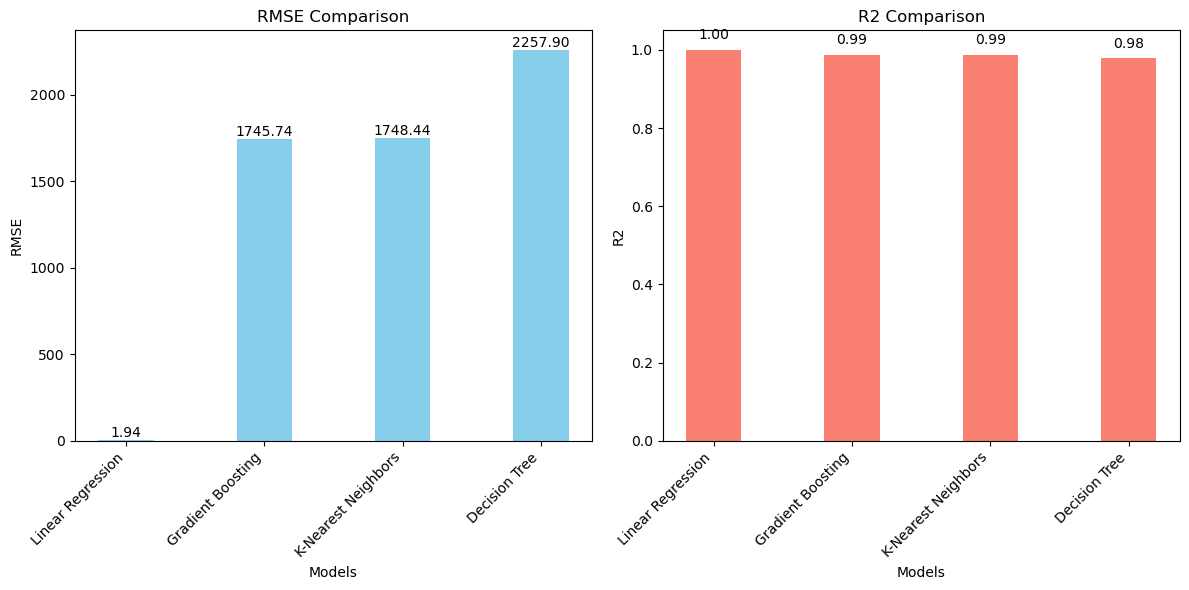

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ["Linear Regression", "Gradient Boosting", "K-Nearest Neighbors", "Decision Tree"]

# RMSE scores for each model
rmse_scores = [rmse_lr,rmse_gb, rmse_knn, rmse_dt] 
# R-squared scores for each model
r2_scores = [r2_lr,r2_gb, r2_knn, r2_dt]  

# Sorting models based on RMSE scores
sorted_models_rmse = [x for _, x in sorted(zip(rmse_scores, models))]
sorted_rmse_scores = sorted(rmse_scores)

# Sorting models based on R2 scores
sorted_models_r2 = [x for _, x in sorted(zip(r2_scores, models), reverse=True)]
sorted_r2_scores = sorted(r2_scores, reverse=True)

# Plotting
bar_width = 0.4
x = np.arange(len(models))

plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
plt.bar(x, sorted_rmse_scores, bar_width, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.xticks(x, sorted_models_rmse, rotation=45, ha="right")
for i, v in enumerate(sorted_rmse_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# R2 comparison
plt.subplot(1, 2, 2)
plt.bar(x, sorted_r2_scores, bar_width, color='salmon')
plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 Comparison')
plt.xticks(x, sorted_models_r2, rotation=45, ha="right")
for i, v in enumerate(sorted_r2_scores):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



R-squared (R2):
R2 ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain the variance in the target variable at all.

**Linear Regression depicts higher R2 value closer to 1 indicates a better fit of the model to the data.**

Root Mean Squared Error (RMSE):
RMSE measures the average deviation of the predicted values from the actual values. Lower RMSE values indicate better model performance.
**Linear Regression depicts lower RMSE**